In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [2]:
# load data
train = pd.read_csv('/Users/pliu/Downloads/all/train.csv')
test = pd.read_csv('/Users/pliu/Downloads/all/test.csv')
train.shape # (1460, 81)
test.shape # (1459, 80)

(1459, 80)

In [5]:
# check if duplication in identifer exists
print(train.shape[0] - len(set(train.Id)))
print(test.shape[0] - len(set(test.Id)))
# no duplicate in identifer

0
0


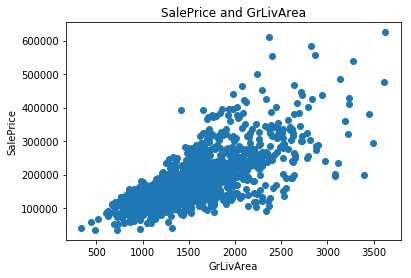

In [13]:
# outlier 
plt.scatter(train.GrLivArea, train.SalePrice)
plt.title('SalePrice and GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

In [10]:
# remove outlier
train = train[train.GrLivArea < 4000]
train.shape

(1456, 81)

/miniconda3/envs/ml36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


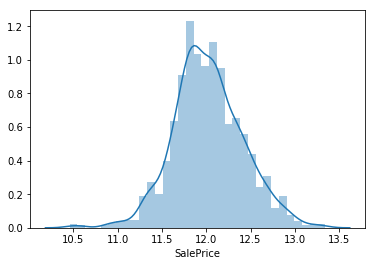

In [14]:
# log transform the target var
train.SalePrice = np.log1p(train.SalePrice)
y = train.SalePrice

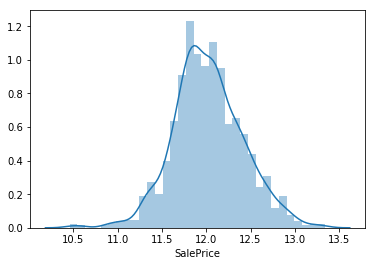

In [19]:
sns.distplot(train['SalePrice']);

In [20]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                       test.loc[:,'MSSubClass':'SaleCondition']))
all_data.shape

(2915, 79)

In [38]:
# create a col to record missing value per row before missing value processing
all_data['missing_per_row'] = all_data.isnull().sum(axis=1)
all_data['missing_per_row'].value_counts()

4     1266
5      993
3      267
6      122
10     114
9       64
2       29
11      17
7       14
15      10
8        9
14       3
12       3
1        2
13       1
16       1
Name: missing_per_row, dtype: int64

In [42]:
# col with missing value
all_data_na = (all_data.isnull().sum()) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na==0].index).sort_values(ascending=False)
all_data_na.index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageFinish', 'GarageYrBlt', 'GarageQual', 'GarageCond', 'GarageType',
       'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1',
       'MasVnrType', 'MasVnrArea', 'MSZoning', 'BsmtFullBath', 'BsmtHalfBath',
       'Utilities', 'Functional', 'Exterior2nd', 'Exterior1st', 'SaleType',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Electrical', 'KitchenQual',
       'GarageCars', 'GarageArea', 'TotalBsmtSF'],
      dtype='object')

In [79]:
# input missing
by = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1",
     "BsmtFinType2", "Fence", "FireplaceQu", "GarageType", "GarageFinish",
     "GarageQual", "GarageCond", "MasVnrType", "MiscFeature", "PoolQC"]
for col in by:
    all_data[col] = all_data[col].fillna('None')

In [81]:
by = ["BedroomAbvGr", "BsmtFullBath", "BsmtHalfBath", "BsmtUnfSF","EnclosedPorch",
     "GarageArea", "GarageCars", "LotFrontage", "MasVnrArea", "GarageYrBlt", "TotalBsmtSF",
     "BsmtFinSF1", "BsmtFinSF2"]
for col in by:
    all_data[col] = all_data[col].fillna(0)

In [70]:
by = ["CentralAir" ]
for col in by:
    all_data[col] = all_data[col].fillna('N')

In [83]:
by = ["Condition1", "Condition2", "Functional", "KitchenQual", "Utilities",
     "MSZoning", "SaleType", "Electrical", "Exterior1st", "Exterior2nd"]
for col in by:
    all_data[col] = all_data[col].fillna(all_data["Condition1"].mode()[0])

In [77]:
all_data.Electrical.isnull().sum()

1

In [78]:
all_data.Electrical.value_counts()

SBrkr    2667
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64